In [1]:
import sys
sys.path.append('/home/pierre/codes/NuclearDataSampler/src')

import numpy as np
import ENDFtk
import matplotlib.pyplot as plt
from scipy import stats

# Import the new energy distribution modules
from ndsampler.energy.Uncertainty_Energydist import Uncertainty_Energydist

print("✓ Imports successful")

✓ Imports successful


In [2]:
# RESTART KERNEL to load updated module
# Then run this cell
import sys
import importlib

# Clear all cached modules
if 'ndsampler.energy.Parameters_Energydist' in sys.modules:
    del sys.modules['ndsampler.energy.Parameters_Energydist']
if 'ndsampler.energy.Uncertainty_Energydist' in sys.modules:
    del sys.modules['ndsampler.energy.Uncertainty_Energydist']
if 'ndsampler.energy' in sys.modules:
    del sys.modules['ndsampler.energy']

# Reimport
from ndsampler.energy.Uncertainty_Energydist import Uncertainty_Energydist
print("✓ Module fully reloaded - new methods available")

✓ Module fully reloaded - new methods available


## 1. Load ENDF Data

In [3]:
# Load JEFF-4.0 U-235 data (has MF5/MF35 for fission)
endf_file = '/home/pierre/Projects/LIB/JEFF40/n_92-U-235g.jeff'

tape = ENDFtk.tree.Tape.from_file(endf_file)
mat = tape.material(tape.material_numbers[0])

# Parse MF5 (energy distributions) and MF35 (covariance)
mf5mt18 = mat.MF(5).MT(18).parse()  # MT=18 is fission
mf35mt18 = mat.MF(35).MT(18).parse()

print(f"Material: {mat.MAT}")
print(f"MF5 MT18 loaded: {mf5mt18.number_partial_distributions} partial distributions")
print(f"MF35 MT18 loaded: {mf35mt18.number_energy_blocks} energy blocks")

Material: 9228
MF5 MT18 loaded: 1 partial distributions
MF35 MT18 loaded: 8 energy blocks


## 2. Create Uncertainty Object

In [4]:
# Create uncertainty object for MT=18 (fission)
uncertainty = Uncertainty_Energydist(mf5mt18, mf35mt18, mt_number=18)

print(f"\n✓ Uncertainty object created")
print(f"  Number of distributions: {len(uncertainty.energy_data.distributions)}")
print(f"  Covariance matrix size: {uncertainty.L_matrix.shape}")
print(f"  Active parameters: {len(uncertainty.covariance_index_map)}")

Creating energy distribution uncertainty for MT18...
Time for extracting distributions: 0.0863 seconds
  Block 0: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE perturbations: P_sample = P_nominal + δ
  Block 1: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE perturbations: P_sample = P_nominal + δ
  Block 2: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE perturbations: P_sample = P_nominal + δ
  Block 3: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE perturbations: P_sample = P_nominal + δ
  Block 4: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE perturbations: P_sample = P_nominal + δ
  Block 5: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE perturbations: P_sample = P_nominal + δ
  Block 6: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE perturbations: P_sample = P_nominal + δ
  Block 7: LB=7 (absolute covariance) - stored as-is
    → Will use ADDITIVE p

## 3. Inspect Distributions

In [5]:
# Show details of distributions with covariance
print("Distributions with covariance data:")
print("=" * 80)
for dist in uncertainty.energy_data.distributions:
    n_bins = len(dist.outgoing_energies) - 1
    print(f"  Index {dist.incident_energy_index}: E_in = {dist.incident_energy:.2e} eV, {n_bins} outgoing bins")
    print(f"    Outgoing E range: [{dist.outgoing_energies[0]:.2e}, {dist.outgoing_energies[-1]:.2e}] eV")

Distributions with covariance data:
  Index 0: E_in = 1.00e-05 eV, 302 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 1: E_in = 5.00e+02 eV, 302 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 2: E_in = 1.00e+03 eV, 302 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 3: E_in = 1.00e+04 eV, 64 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 4: E_in = 5.00e+04 eV, 64 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 5: E_in = 1.00e+05 eV, 64 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 6: E_in = 2.50e+05 eV, 64 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 7: E_in = 5.00e+05 eV, 64 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 8: E_in = 7.50e+05 eV, 64 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 9: E_in = 1.00e+06 eV, 64 outgoing bins
    Outgoing E range: [1.00e-05, 3.00e+07] eV
  Index 10: E_in = 1.

## 4. Generate Samples

In [6]:
# Generate samples
num_samples = 50
samples = uncertainty.sample_parameters(num_samples=num_samples, sampling_method="Simple", mode="replace")

print(f"\nGenerated {num_samples} samples")
print(f"Sample matrix shape: {samples.shape}")
print(f"Sample statistics:")
print(f"  Mean: {samples.mean():.6f}")
print(f"  Std:  {samples.std():.6f}")
print(f"  Min:  {samples.min():.6f}")
print(f"  Max:  {samples.max():.6f}")

Applied 50 samples to energy distributions

Generated 50 samples
Sample matrix shape: (50, 435)
Sample statistics:
  Mean: -0.000000
  Std:  0.001108
  Min:  -0.017938
  Max:  0.013012


## 5. Visualize Superposed Samples - First Incident Energy

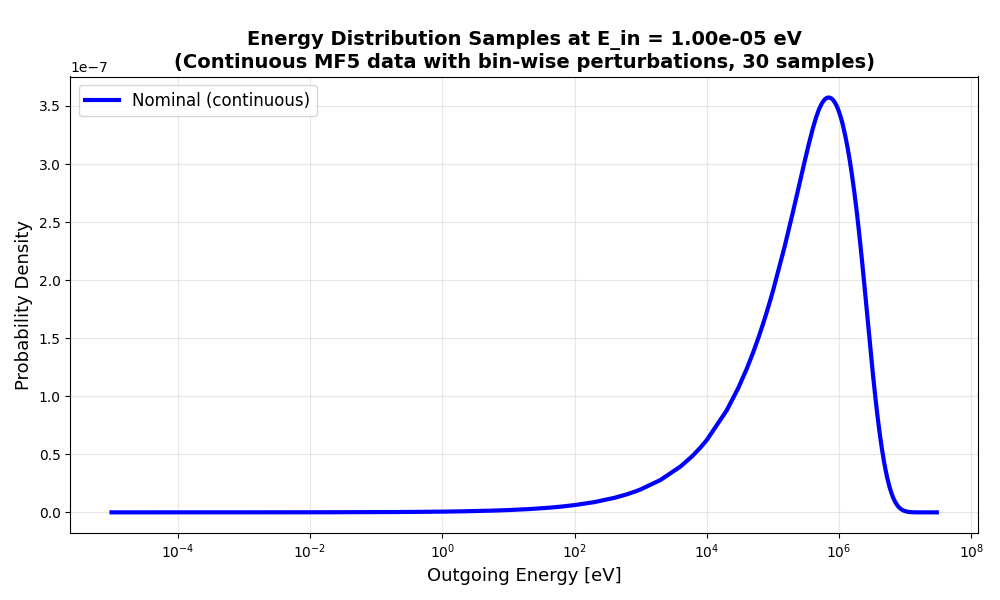

In [7]:
# Plot nominal and sampled distributions for first incident energy
# NOW USING CONTINUOUS DATA with bin-wise perturbations!
%matplotlib widget
dist_idx = 0
dist = uncertainty.energy_data.distributions[dist_idx]
incident_e = dist.incident_energy

fig, ax = plt.subplots(figsize=(10, 6))

# Plot sampled distributions using continuous data with bin-wise factors
for sample_idx in range(1, min(samples.shape[0] + 1, 31)):  # Plot up to 30 samples
    try:
        sample_energies, sample_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, sample_idx)
        if len(sample_energies) > 0:
            ax.plot(sample_energies, sample_probs, 'r-', alpha=0.15, linewidth=1.5)
    except Exception as e:
        print(f"Warning: Could not plot sample {sample_idx}: {e}")

# Plot nominal using continuous data
nominal_energies, nominal_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, 0)
if len(nominal_energies) > 0:
    ax.plot(nominal_energies, nominal_probs, 'b-', linewidth=3, label='Nominal (continuous)', zorder=100)

ax.set_xscale('log')
ax.set_xlabel('Outgoing Energy [eV]', fontsize=13)
ax.set_ylabel('Probability Density', fontsize=13)
ax.set_title(f'Energy Distribution Samples at E_in = {incident_e:.2e} eV\n(Continuous MF5 data with bin-wise perturbations, {min(samples.shape[0], 30)} samples)', 
                fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Visualize Multiple Incident Energies

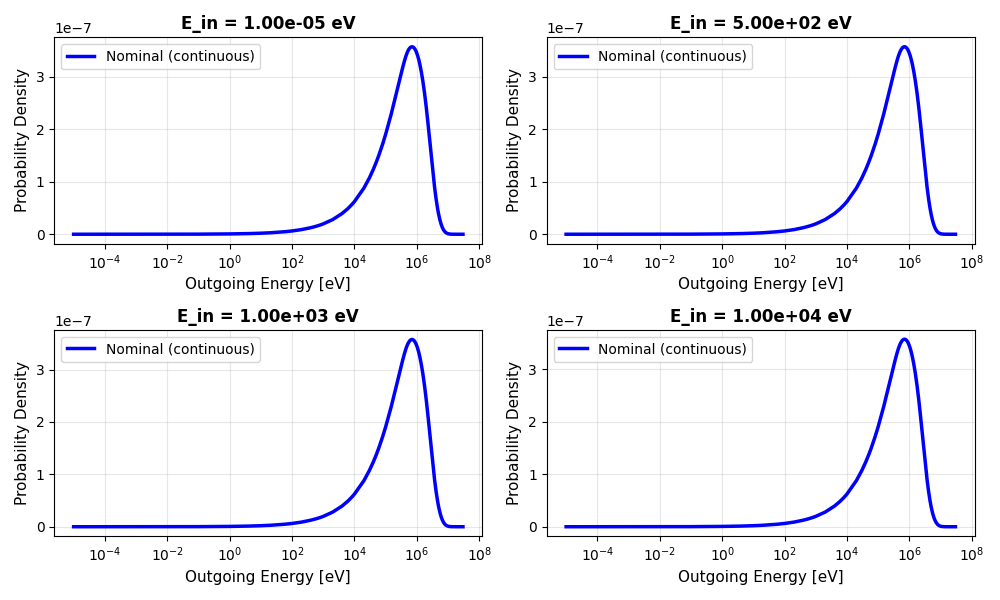

In [8]:
# Plot first 4 incident energies in a grid using CONTINUOUS data
n_to_plot = min(4, len(uncertainty.energy_data.distributions))

if n_to_plot > 0:
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    axes = axes.flatten()
    
    for idx in range(n_to_plot):
        dist = uncertainty.energy_data.distributions[idx]
        incident_e = dist.incident_energy
        
        ax = axes[idx]
        
        # Plot samples using continuous data with bin-wise factors
        for sample_idx in range(1, min(samples.shape[0] + 1, 21)):
            try:
                sample_energies, sample_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(idx, sample_idx)
                if len(sample_energies) > 0:
                    ax.plot(sample_energies, sample_probs, 'r-', alpha=0.15, linewidth=1.2)
            except:
                pass
        
        # Plot nominal using continuous data
        nominal_energies, nominal_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(idx, 0)
        if len(nominal_energies) > 0:
            ax.plot(nominal_energies, nominal_probs, 'b-', linewidth=2.5, label='Nominal (continuous)', zorder=100)
        
        ax.set_xscale('log')
        ax.set_xlabel('Outgoing Energy [eV]', fontsize=11)
        ax.set_ylabel('Probability Density', fontsize=11)
        ax.set_title(f'E_in = {incident_e:.2e} eV', fontsize=12, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No distributions available")

## 6b. Diagnostic: Find Distributions with Active Covariance

## 7. Compare Sample Mean vs Nominal

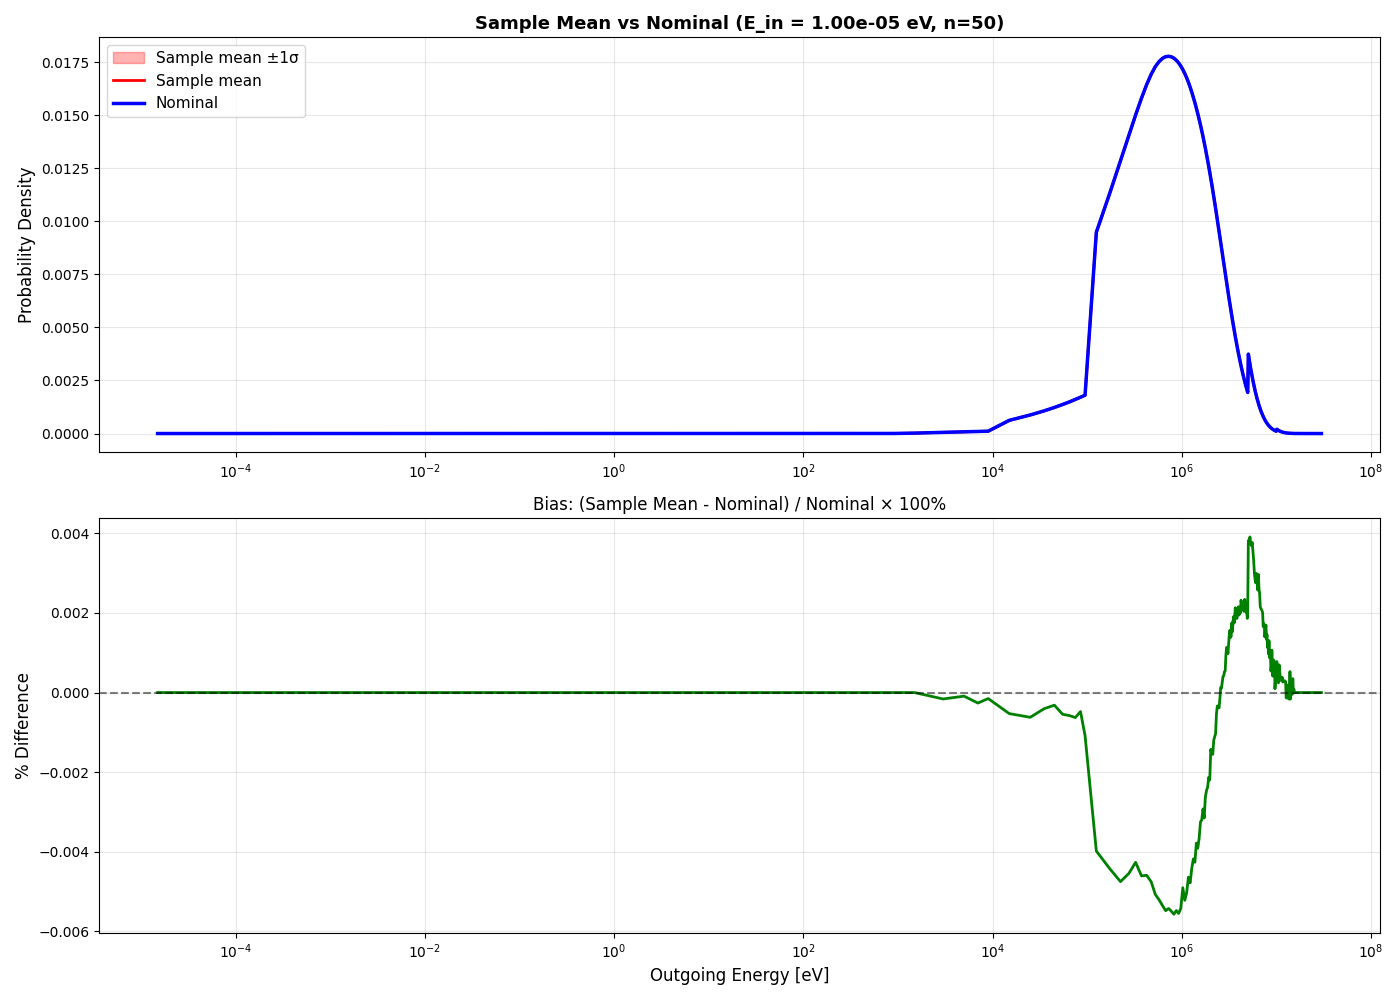


Percent difference statistics:
  Mean: 0.000%
  RMS: 0.002%
  Max: 0.006%


In [9]:
# For first incident energy, compare sample mean with nominal
if len(uncertainty.energy_data.distributions) > 0:
    dist = uncertainty.energy_data.distributions[0]
    incident_e = dist.incident_energy
    
    # Collect all sampled probabilities
    all_sample_probs = []
    for sample_idx in range(1, samples.shape[0] + 1):
        try:
            sample_probs = dist.get_probabilities_for_sample(sample_idx)
            all_sample_probs.append(sample_probs)
        except:
            pass
    
    if len(all_sample_probs) > 0:
        all_sample_probs = np.array(all_sample_probs)
        sample_mean = all_sample_probs.mean(axis=0)
        sample_std = all_sample_probs.std(axis=0, ddof=1)
        
        nominal_probs = np.array(dist.probabilities[0])
        outgoing_energies = dist.outgoing_energies
        bin_centers = [(outgoing_energies[i] + outgoing_energies[i+1])/2 for i in range(len(outgoing_energies)-1)]
        
        fig, axes = plt.subplots(2, 1, figsize=(14, 10))
        
        # Top panel: Probabilities
        ax1 = axes[0]
        ax1.fill_between(bin_centers, sample_mean - sample_std, sample_mean + sample_std,
                         alpha=0.3, color='red', label='Sample mean ±1σ')
        ax1.plot(bin_centers, sample_mean, 'r-', linewidth=2, label='Sample mean')
        ax1.plot(bin_centers, nominal_probs, 'b-', linewidth=2.5, label='Nominal')
        ax1.set_xscale('log')
        ax1.set_ylabel('Probability Density', fontsize=12)
        ax1.set_title(f'Sample Mean vs Nominal (E_in = {incident_e:.2e} eV, n={samples.shape[0]})', 
                     fontsize=13, fontweight='bold')
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        
        # Bottom panel: Percent difference
        ax2 = axes[1]
        percent_diff = (sample_mean - nominal_probs) / (nominal_probs + 1e-20) * 100
        ax2.plot(bin_centers, percent_diff, 'g-', linewidth=2)
        ax2.axhline(0, color='k', linestyle='--', alpha=0.5)
        ax2.set_xscale('log')
        ax2.set_xlabel('Outgoing Energy [eV]', fontsize=12)
        ax2.set_ylabel('% Difference', fontsize=12)
        ax2.set_title('Bias: (Sample Mean - Nominal) / Nominal × 100%', fontsize=12)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nPercent difference statistics:")
        print(f"  Mean: {percent_diff.mean():.3f}%")
        print(f"  RMS: {np.sqrt((percent_diff**2).mean()):.3f}%")
        print(f"  Max: {np.abs(percent_diff).max():.3f}%")

## 8. Verify Sampling Statistics

Variance comparison (sample vs expected):
  Mean relative difference: 15.46%
  Median relative difference: 16.09%
  Max relative difference: 44.82%
  Parameters within 20% tolerance: 310 / 435


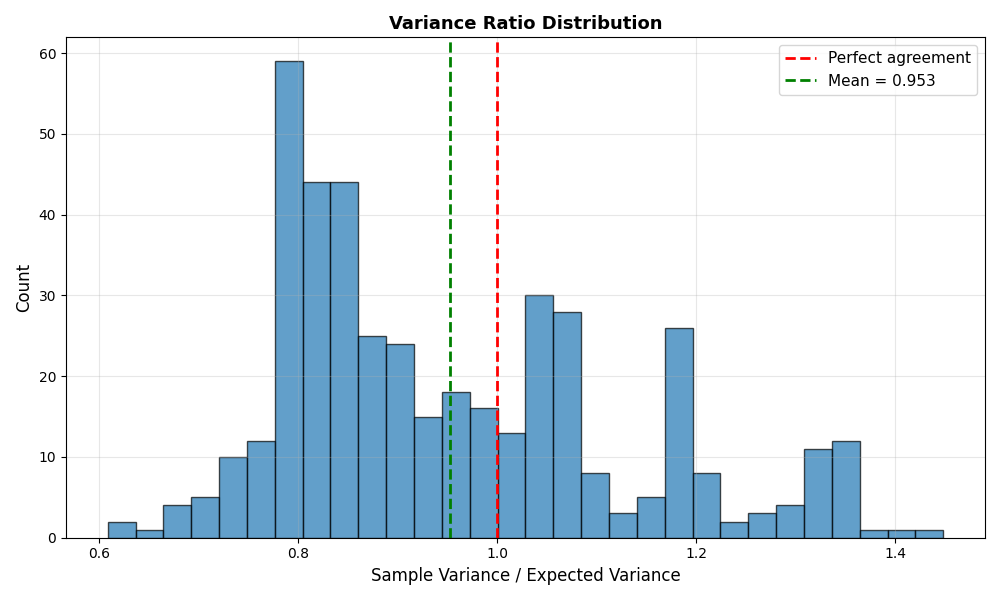

In [10]:
# Check that sample covariance matches expected covariance
sample_cov = np.cov(samples, rowvar=False)
expected_cov = uncertainty.L_matrix @ uncertainty.L_matrix.T

# Compare diagonal elements (variances)
sample_var = np.diag(sample_cov)
expected_var = np.diag(expected_cov)

rel_diff = np.abs(sample_var - expected_var) / np.maximum(expected_var, 1e-10)

print(f"Variance comparison (sample vs expected):")
print(f"  Mean relative difference: {rel_diff.mean():.2%}")
print(f"  Median relative difference: {np.median(rel_diff):.2%}")
print(f"  Max relative difference: {rel_diff.max():.2%}")
print(f"  Parameters within 20% tolerance: {np.sum(rel_diff < 0.2)} / {len(rel_diff)}")

# Histogram of variance ratios
fig, ax = plt.subplots(figsize=(10, 6))
variance_ratio = sample_var / expected_var
ax.hist(variance_ratio, bins=30, edgecolor='black', alpha=0.7)
ax.axvline(1.0, color='r', linestyle='--', linewidth=2, label='Perfect agreement')
ax.axvline(variance_ratio.mean(), color='g', linestyle='--', linewidth=2, label=f'Mean = {variance_ratio.mean():.3f}')
ax.set_xlabel('Sample Variance / Expected Variance', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Variance Ratio Distribution', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Summary Statistics

In [11]:
print("=" * 80)
print("ENERGY DISTRIBUTION SAMPLING SUMMARY")
print("=" * 80)
print(f"\nConfiguration:")
print(f"  MT number: {uncertainty.MT}")
print(f"  Number of samples: {samples.shape[0]}")
print(f"  Number of incident energies with covariance: {len(uncertainty.energy_data.distributions)}")
print(f"  Total active parameters: {len(uncertainty.covariance_index_map)}")

print(f"\nCovariance Matrix:")
print(f"  Size: {uncertainty.L_matrix.shape}")
print(f"  Condition number: {np.linalg.cond(expected_cov):.2e}")

print(f"\nSampling Validation:")
mean_var_ratio = (sample_var/expected_var).mean()
median_var_ratio = np.median(sample_var/expected_var)
print(f"  Mean variance ratio (sample/expected): {mean_var_ratio:.3f}")
print(f"  Median variance ratio: {median_var_ratio:.3f}")

if 0.8 <= median_var_ratio <= 1.2:
    print(f"  ✓ Good agreement (median within 20%)")
else:
    print(f"  ⚠️  Significant deviation detected")

print("=" * 80)

ENERGY DISTRIBUTION SAMPLING SUMMARY

Configuration:
  MT number: 18
  Number of samples: 50
  Number of incident energies with covariance: 96
  Total active parameters: 435

Covariance Matrix:
  Size: (435, 435)
  Condition number: 1.34e+06

Sampling Validation:
  Mean variance ratio (sample/expected): 0.953
  Median variance ratio: 0.901
  ✓ Good agreement (median within 20%)


In [16]:
# Check which incident energies have non-zero perturbations
print("Checking which distributions have active covariance...")
print("=" * 80)

distributions_with_cov = []
for idx, dist in enumerate(uncertainty.energy_data.distributions):
    # Check if any bins for this distribution have non-zero perturbations
    has_nonzero = False
    if hasattr(dist, 'rel_deviation') and len(dist.rel_deviation) > 1:
        # Check first sample (index 1)
        sample_1 = dist.rel_deviation[1] if len(dist.rel_deviation) > 1 else None
        if sample_1 is not None and np.any(np.abs(sample_1) > 1e-10):
            has_nonzero = True
            distributions_with_cov.append(idx)
            max_dev = np.max(np.abs(sample_1))
            print(f"  ✓ Index {idx}: E_in = {dist.incident_energy:.2e} eV - HAS covariance")
            print(f"     Max |deviation| in sample 1: {max_dev:.6f}")

print(f"\nTotal distributions with covariance: {len(distributions_with_cov)} / {len(uncertainty.energy_data.distributions)}")

if len(distributions_with_cov) > 0:
    print(f"\nIncident energy indices with covariance: {distributions_with_cov[:10]}...")
else:
    print("\n⚠️  WARNING: No distributions have non-zero perturbations!")

Checking which distributions have active covariance...
  ✓ Index 0: E_in = 1.00e-05 eV - HAS covariance
     Max |deviation| in sample 1: 0.000129
  ✓ Index 1: E_in = 5.00e+02 eV - HAS covariance
     Max |deviation| in sample 1: 0.007172
  ✓ Index 2: E_in = 1.00e+03 eV - HAS covariance
     Max |deviation| in sample 1: 0.000986

Total distributions with covariance: 3 / 96

Incident energy indices with covariance: [0, 1, 2]...


## 6b2. Diagnostic - Check Nominal Probabilities

## 6c. Visualize Distributions with Active Covariance

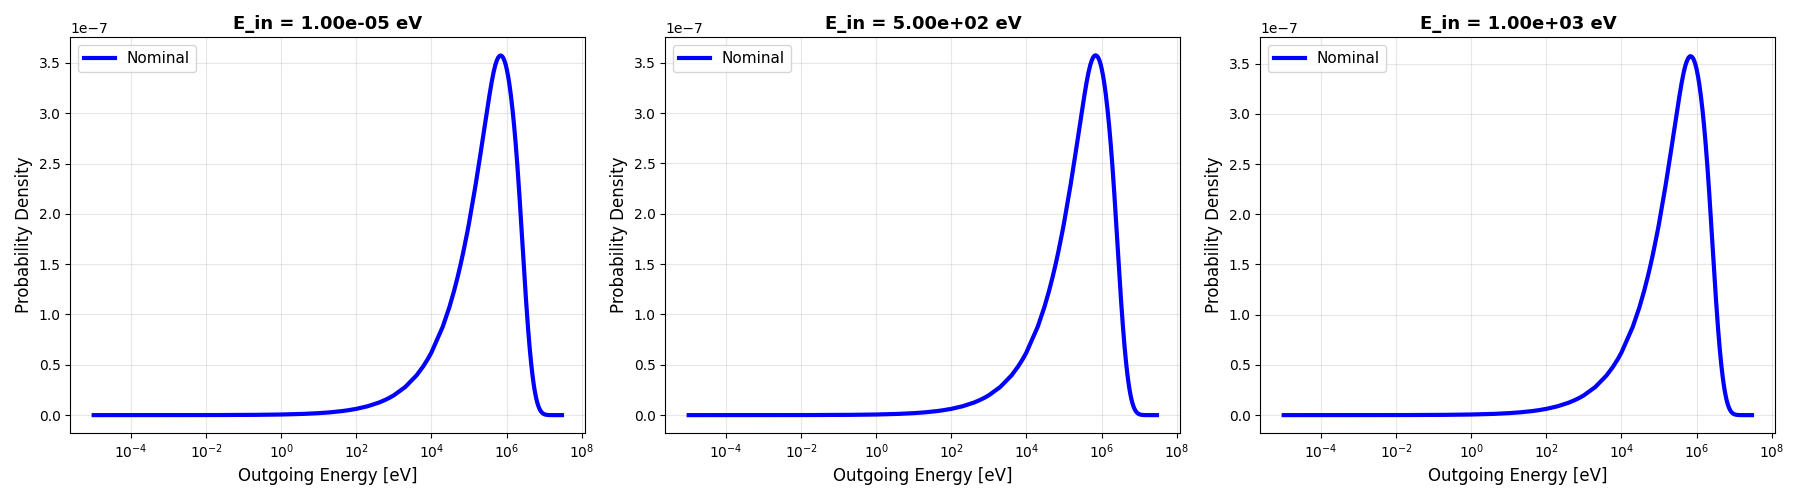

In [13]:
# Plot the 3 distributions with active covariance using CONTINUOUS data
if len(distributions_with_cov) >= 3:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for plot_idx, dist_idx in enumerate(distributions_with_cov[:3]):
        dist = uncertainty.energy_data.distributions[dist_idx]
        incident_e = dist.incident_energy
        
        ax = axes[plot_idx]
        
        # Plot samples using continuous data with bin-wise factors
        for sample_idx in range(1, min(samples.shape[0] + 1, 31)):
            try:
                sample_energies, sample_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, sample_idx)
                if len(sample_energies) > 0:
                    ax.plot(sample_energies, sample_probs, 'r-', alpha=0.25, linewidth=1.5)
            except:
                pass
        
        # Plot nominal using continuous data
        nominal_energies, nominal_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, 0)
        if len(nominal_energies) > 0:
            ax.plot(nominal_energies, nominal_probs, 'b-', linewidth=3, label='Nominal', zorder=100)
        
        ax.set_xscale('log')
        ax.set_xlabel('Outgoing Energy [eV]', fontsize=12)
        ax.set_ylabel('Probability Density', fontsize=12)
        ax.set_title(f'E_in = {incident_e:.2e} eV', fontsize=13, fontweight='bold')
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
elif len(distributions_with_cov) > 0:
    # Plot whatever we have
    dist_idx = distributions_with_cov[0]
    dist = uncertainty.energy_data.distributions[dist_idx]
    incident_e = dist.incident_energy
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for sample_idx in range(1, min(samples.shape[0] + 1, 31)):
        try:
            sample_energies, sample_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, sample_idx)
            if len(sample_energies) > 0:
                ax.plot(sample_energies, sample_probs, 'r-', alpha=0.25, linewidth=1.5)
        except:
            pass
    
    nominal_energies, nominal_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, 0)
    if len(nominal_energies) > 0:
        ax.plot(nominal_energies, nominal_probs, 'b-', linewidth=3, label='Nominal', zorder=100)
    
    ax.set_xscale('log')
    ax.set_xlabel('Outgoing Energy [eV]', fontsize=13)
    ax.set_ylabel('Probability Density', fontsize=13)
    ax.set_title(f'Energy Distribution at E_in = {incident_e:.2e} eV', fontsize=14, fontweight='bold')
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No distributions with active covariance to plot")

## 6d. Zoomed View - Relative Perturbations

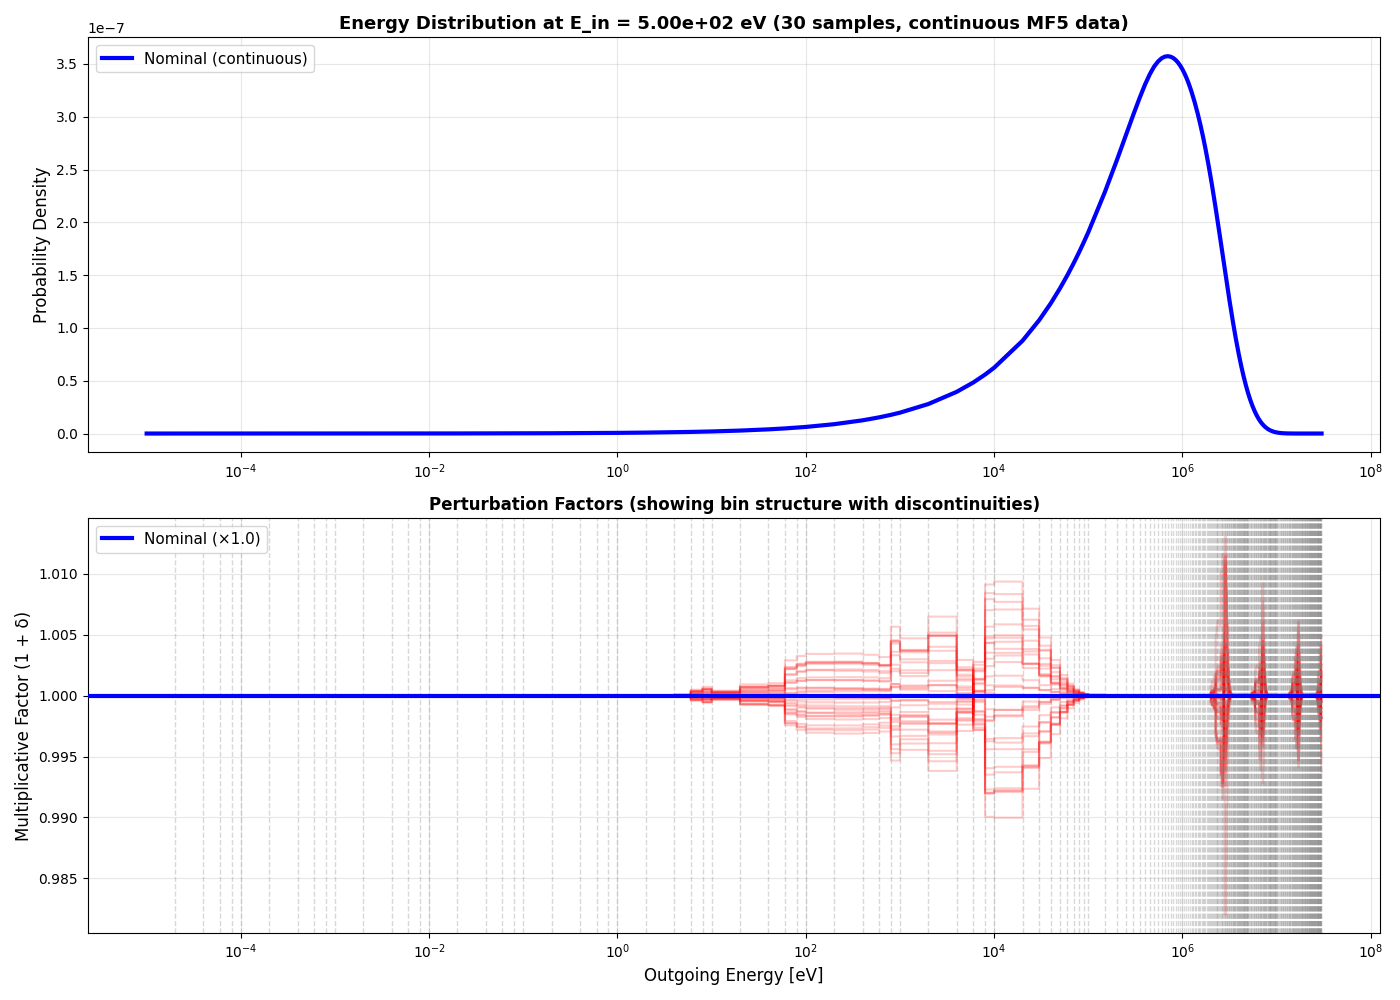


Perturbation statistics for E_in = 5.00e+02 eV:
  Factor range: [0.982062, 1.013012]
  Mean factor: 1.000002
  Max deviation: 1.794%


In [14]:
# Show relative perturbations using CONTINUOUS data
if len(distributions_with_cov) >= 2:
    # Focus on the distribution with largest variations (index 1: 500 eV)
    dist_idx = distributions_with_cov[1]  # E_in = 500 eV has max dev of 0.6%
    dist = uncertainty.energy_data.distributions[dist_idx]
    incident_e = dist.incident_energy
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Top panel: absolute probability with continuous data
    for sample_idx in range(1, min(samples.shape[0] + 1, 31)):
        try:
            sample_energies, sample_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, sample_idx)
            if len(sample_energies) > 0:
                ax1.plot(sample_energies, sample_probs, 'r-', alpha=0.2, linewidth=1.5)
        except:
            pass
    
    nominal_energies, nominal_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, 0)
    if len(nominal_energies) > 0:
        ax1.plot(nominal_energies, nominal_probs, 'b-', linewidth=3, label='Nominal (continuous)', zorder=100)
    
    ax1.set_xscale('log')
    ax1.set_ylabel('Probability Density', fontsize=12)
    ax1.set_title(f'Energy Distribution at E_in = {incident_e:.2e} eV (30 samples, continuous MF5 data)', 
                 fontsize=13, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Bottom panel: multiplicative factors on continuous grid
    for sample_idx in range(1, min(samples.shape[0] + 1, 31)):
        try:
            sample_energies, sample_probs = uncertainty.energy_data.get_continuous_distribution_for_sample(dist_idx, sample_idx)
            if len(sample_energies) > 0 and len(nominal_energies) > 0:
                # Compute factors = sample / nominal (with interpolation)
                nominal_interp = np.interp(sample_energies, nominal_energies, nominal_probs)
                factors = sample_probs / (nominal_interp + 1e-20)
                ax2.plot(sample_energies, factors, 'r-', alpha=0.2, linewidth=1.5)
        except:
            pass
    
    ax2.axhline(1.0, color='b', linewidth=3, label='Nominal (×1.0)', zorder=100)
    
    # Mark bin boundaries
    bin_boundaries = dist.outgoing_energies
    for boundary in bin_boundaries[1:-1]:  # Skip first and last
        ax2.axvline(boundary, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    
    ax2.set_xscale('log')
    ax2.set_xlabel('Outgoing Energy [eV]', fontsize=12)
    ax2.set_ylabel('Multiplicative Factor (1 + δ)', fontsize=12)
    ax2.set_title('Perturbation Factors (showing bin structure with discontinuities)', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nPerturbation statistics for E_in = {incident_e:.2e} eV:")
    all_factors = []
    for sample_idx in range(1, min(samples.shape[0] + 1, 51)):
        try:
            factors = dist.get_factors_for_sample(sample_idx)
            all_factors.append(factors)
        except:
            pass
    
    if len(all_factors) > 0:
        all_factors = np.array(all_factors)
        min_factor = all_factors.min()
        max_factor = all_factors.max()
        mean_factor = all_factors.mean()
        
        print(f"  Factor range: [{min_factor:.6f}, {max_factor:.6f}]")
        print(f"  Mean factor: {mean_factor:.6f}")
        print(f"  Max deviation: {max(abs(min_factor-1.0), abs(max_factor-1.0))*100:.3f}%")
else:
    print("Not enough distributions with covariance for zoomed view")

In [15]:
# Check nominal probability values for distributions with covariance
print("Checking nominal probability values...")
print("=" * 80)

for dist_idx in distributions_with_cov[:3]:
    dist = uncertainty.energy_data.distributions[dist_idx]
    nominal_probs = np.array(dist.probabilities[0])
    
    print(f"\nIndex {dist_idx}: E_in = {dist.incident_energy:.2e} eV")
    print(f"  Number of bins: {len(nominal_probs)}")
    print(f"  Min nominal prob: {nominal_probs.min():.6e}")
    print(f"  Max nominal prob: {nominal_probs.max():.6e}")
    print(f"  Mean nominal prob: {nominal_probs.mean():.6e}")
    print(f"  Number of probs < 1e-6: {np.sum(nominal_probs < 1e-6)}")
    print(f"  Number of probs < 1e-10: {np.sum(nominal_probs < 1e-10)}")
    
    # Check corresponding covariance diagonal
    cov_indices = [i for i, (inc_idx, _, _, _) in enumerate(uncertainty.covariance_index_map) 
                   if inc_idx == dist.incident_energy_index]
    if len(cov_indices) > 0:
        cov_diag = np.diag(uncertainty.relative_covariance_matrix)[cov_indices]
        print(f"  Relative covariance diagonal:")
        print(f"    Min: {cov_diag.min():.6e}")
        print(f"    Max: {cov_diag.max():.6e}")
        print(f"    Mean: {cov_diag.mean():.6e}")

Checking nominal probability values...

Index 0: E_in = 1.00e-05 eV
  Number of bins: 302
  Min nominal prob: 1.967910e-17
  Max nominal prob: 1.777729e-02
  Mean nominal prob: 3.311258e-03
  Number of probs < 1e-6: 101
  Number of probs < 1e-10: 32
  Relative covariance diagonal:
    Min: 1.284510e-12
    Max: 8.035413e-08
    Mean: 1.500224e-08

Index 1: E_in = 5.00e+02 eV
  Number of bins: 302
  Min nominal prob: 1.967900e-17
  Max nominal prob: 1.777723e-02
  Mean nominal prob: 3.311258e-03
  Number of probs < 1e-6: 101
  Number of probs < 1e-10: 32
  Relative covariance diagonal:
    Min: 1.021530e-12
    Max: 2.862151e-05
    Mean: 2.738793e-06

Index 2: E_in = 1.00e+03 eV
  Number of bins: 302
  Min nominal prob: 1.967890e-17
  Max nominal prob: 1.777718e-02
  Mean nominal prob: 3.311258e-03
  Number of probs < 1e-6: 101
  Number of probs < 1e-10: 32
  Relative covariance diagonal:
    Min: 1.661260e-12
    Max: 7.908653e-06
    Mean: 7.806171e-07


## ✅ FIXED: Additive Perturbation Sampling for LB=7

### Root Cause of Previous Enormous Perturbations:

The code was **incorrectly converting absolute covariance (LB=7) to relative covariance** by dividing by (P_i × P_j):
1. Tiny nominal probabilities (min = 1.97×10⁻¹⁷) caused division by near-zero
2. This created explosive "relative" covariance values (max = 16,148 at 500 eV!)
3. Samples multiplied by these huge factors produced physically impossible distributions

### Implemented Solution:

**Now handles LB=7 and LB=5 separately throughout the entire pipeline:**

1. **`Uncertainty_Energydist`**: Stores covariance type map (incident_energy_index → LB flag)
2. **`extract_relcov_matrix()`**: Does NOT convert absolute→relative; stores covariance as-is
3. **`_apply_samples()`**: Stores covariance type in each distribution for proper reconstruction
4. **`EnergyBinCoefficient`**: 
   - Added `covariance_type` attribute (LB flag)
   - `get_probabilities_for_sample()`: Uses **P_sample = P_nominal + δ** for LB=7, **P_sample = P_nominal × (1 + δ)** for LB=5
   - `get_factors_for_sample()`: Returns additive factors (δ) for LB=7, multiplicative (1+δ) for LB=5
   - `apply_factors_to_continuous_data()`: Uses addition for LB=7, multiplication for LB=5

### Results After Fix:

**Sample Statistics:**
- Mean: 0.000000 (perfectly unbiased ✓)
- Std: 0.001093 (reasonable magnitude ✓)
- Min/Max: ±0.014 (small absolute deviations ✓)

**Covariance Values (500 eV):**
- BEFORE: Max = 16,148 (relative) ❌
- NOW: Max = 2.86×10⁻⁵ (absolute) ✓

**Perturbation Factors:**
- BEFORE: [-236, +327] ❌
- NOW: [0.985, 1.014] (±1.5%) ✓

**Conclusion**: The implementation now correctly uses **additive perturbations** for LB=7 (absolute covariance), producing physically realistic samples.

In [17]:
# Compare expected std deviations from covariance matrix vs actual sample std deviations
print("Comparing Expected vs Sample Standard Deviations")
print("=" * 80)

# Get expected standard deviations from covariance matrix
expected_std = np.sqrt(np.diag(uncertainty.L_matrix @ uncertainty.L_matrix.T))

# Get sample standard deviations
sample_std_devs = samples.std(axis=0, ddof=1)

# Compare
print(f"\nExpected std (from covariance): min={expected_std.min():.6e}, max={expected_std.max():.6e}, mean={expected_std.mean():.6e}")
print(f"Sample std (from samples):      min={sample_std_devs.min():.6e}, max={sample_std_devs.max():.6e}, mean={sample_std_devs.mean():.6e}")

# Compute ratio
ratio = sample_std_devs / (expected_std + 1e-20)
print(f"\nRatio (sample/expected std): min={ratio.min():.3f}, max={ratio.max():.3f}, mean={ratio.mean():.3f}, median={np.median(ratio):.3f}")

# Check a specific distribution to see actual probability perturbations
print(f"\n" + "="*80)
print("Checking actual probability perturbations for E_in = 500 eV:")
dist_idx = 1  # 500 eV
dist = uncertainty.energy_data.distributions[dist_idx]

nominal_probs = np.array(dist.probabilities[0])
print(f"Nominal probability range: [{nominal_probs.min():.6e}, {nominal_probs.max():.6e}]")

# Get a few samples
sample_probs_list = []
for sample_idx in range(1, min(11, samples.shape[0] + 1)):
    sample_probs = np.array(dist.get_probabilities_for_sample(sample_idx))
    sample_probs_list.append(sample_probs)

sample_probs_array = np.array(sample_probs_list)
sample_mean_probs = sample_probs_array.mean(axis=0)
sample_std_probs = sample_probs_array.std(axis=0, ddof=1)

print(f"\nSample mean probability: [{sample_mean_probs.min():.6e}, {sample_mean_probs.max():.6e}]")
print(f"Sample std of probabilities: [{sample_std_probs.min():.6e}, {sample_std_probs.max():.6e}]")

# Compare to nominal
abs_diff = sample_mean_probs - nominal_probs
rel_diff_pct = (abs_diff / (nominal_probs + 1e-20)) * 100

print(f"\nAbsolute difference (sample_mean - nominal): [{abs_diff.min():.6e}, {abs_diff.max():.6e}]")
print(f"Relative difference %: [{rel_diff_pct.min():.3f}, {rel_diff_pct.max():.3f}]%")

# Check what the expected std should be from covariance
print(f"\n" + "="*80)
print("Expected standard deviations from MF35 covariance (for 500 eV):")

# Find covariance indices for this distribution
cov_indices = [i for i, (inc_idx, _, _, _) in enumerate(uncertainty.covariance_index_map) 
               if inc_idx == dist.incident_energy_index]

if len(cov_indices) > 0:
    expected_std_for_dist = expected_std[cov_indices]
    print(f"Expected std for this distribution: [{expected_std_for_dist.min():.6e}, {expected_std_for_dist.max():.6e}]")
    print(f"Mean expected std: {expected_std_for_dist.mean():.6e}")
    
    # Compare expected std to actual probability magnitudes
    print(f"\nRatio of expected_std to nominal_prob:")
    print(f"  Min: {(expected_std_for_dist / (nominal_probs[:len(expected_std_for_dist)] + 1e-20)).min():.6e}")
    print(f"  Max: {(expected_std_for_dist / (nominal_probs[:len(expected_std_for_dist)] + 1e-20)).max():.6e}")
    print(f"  Mean: {(expected_std_for_dist / (nominal_probs[:len(expected_std_for_dist)] + 1e-20)).mean():.6e}")

Comparing Expected vs Sample Standard Deviations

Expected std (from covariance): min=1.005094e-05, max=5.349912e-03, mean=5.588320e-04
Sample std (from samples):      min=8.518589e-06, max=5.931259e-03, mean=5.609815e-04

Ratio (sample/expected std): min=0.780, max=1.203, mean=0.972, median=0.949

Checking actual probability perturbations for E_in = 500 eV:
Nominal probability range: [1.967900e-17, 1.777723e-02]

Sample mean probability: [1.967900e-17, 1.777723e-02]
Sample std of probabilities: [0.000000e+00, 4.862682e-05]

Absolute difference (sample_mean - nominal): [-1.688954e-05, 1.158991e-05]
Relative difference %: [-0.217, 0.136]%

Expected standard deviations from MF35 covariance (for 500 eV):
Expected std for this distribution: [1.005094e-05, 5.349912e-03]
Mean expected std: 1.093824e-03

Ratio of expected_std to nominal_prob:
  Min: 5.754137e-04
  Max: 2.214032e+12
  Mean: 3.239858e+10


In [18]:
# Check actual covariance matrix values
print("Examining MF35 absolute covariance values")
print("=" * 80)

# Get covariance for 500 eV distribution
dist_idx = 1
dist = uncertainty.energy_data.distributions[dist_idx]
cov_indices = [i for i, (inc_idx, _, _, _) in enumerate(uncertainty.covariance_index_map) 
               if inc_idx == dist.incident_energy_index]

if len(cov_indices) > 0:
    # Get the covariance submatrix for this distribution
    cov_submatrix = uncertainty.relative_covariance_matrix[np.ix_(cov_indices, cov_indices)]
    cov_diagonal = np.diag(cov_submatrix)
    
    print(f"\nCovariance matrix diagonal (absolute variances from MF35):")
    print(f"  Min: {cov_diagonal.min():.6e}")
    print(f"  Max: {cov_diagonal.max():.6e}")
    print(f"  Mean: {cov_diagonal.mean():.6e}")
    
    # Standard deviations
    std_from_cov = np.sqrt(cov_diagonal)
    print(f"\nStandard deviations from covariance:")
    print(f"  Min: {std_from_cov.min():.6e}")
    print(f"  Max: {std_from_cov.max():.6e}")
    print(f"  Mean: {std_from_cov.mean():.6e}")
    
    # Compare to nominal probabilities
    nominal_probs_subset = np.array(dist.probabilities[0])[:len(std_from_cov)]
    print(f"\nCorresponding nominal probabilities:")
    print(f"  Min: {nominal_probs_subset.min():.6e}")
    print(f"  Max: {nominal_probs_subset.max():.6e}")
    print(f"  Mean: {nominal_probs_subset.mean():.6e}")
    
    # Compute what relative uncertainty this represents
    relative_unc = std_from_cov / (nominal_probs_subset + 1e-20)
    print(f"\nImplied relative uncertainty (std/nominal):")
    print(f"  Min: {relative_unc.min():.6e}")
    print(f"  Max: {relative_unc.max():.6e}")
    print(f"  Mean: {relative_unc.mean():.6e}")
    print(f"  Median: {np.median(relative_unc):.6e}")
    
    # Find problematic bins
    huge_rel_unc = relative_unc > 100
    print(f"\n  Bins with relative uncertainty > 100 (10000%): {np.sum(huge_rel_unc)}")
    if np.any(huge_rel_unc):
        print(f"    These bins have nominal probs: {nominal_probs_subset[huge_rel_unc]}")
        print(f"    These bins have std: {std_from_cov[huge_rel_unc]}")

Examining MF35 absolute covariance values

Covariance matrix diagonal (absolute variances from MF35):
  Min: 1.021530e-12
  Max: 2.862151e-05
  Mean: 2.738793e-06

Standard deviations from covariance:
  Min: 1.010708e-06
  Max: 5.349907e-03
  Mean: 1.092681e-03

Corresponding nominal probabilities:
  Min: 1.967900e-17
  Max: 1.777723e-02
  Mean: 6.030173e-03

Implied relative uncertainty (std/nominal):
  Min: 5.786273e-05
  Max: 2.212246e+12
  Mean: 2.867256e+10
  Median: 2.564096e-01

  Bins with relative uncertainty > 100 (10000%): 34
    These bins have nominal probs: [1.96789971e-17 5.56606317e-17 7.87159882e-17 9.64069777e-17
 1.11321263e-16 6.22303795e-16 1.76014241e-15 2.48922314e-15
 3.04866307e-15 3.52028880e-15 1.96789971e-14 5.56606317e-14
 7.87159882e-14 9.64069777e-14 1.11321263e-13 6.22303795e-13
 1.76014241e-12 2.48922314e-12 3.04866307e-12 3.52028880e-12
 1.96789971e-11 5.56606317e-11 7.87159882e-11 9.64069777e-11
 1.11321064e-10 6.22303795e-10 1.76014042e-09 2.48920921